# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the dataset

In [2]:
data = pd.read_csv('Breast_cancer_data.csv')


In [3]:
data

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [4]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


# Checking Null values

In [5]:
data.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [6]:
correlation = data.corr()

# Construction Heatmap

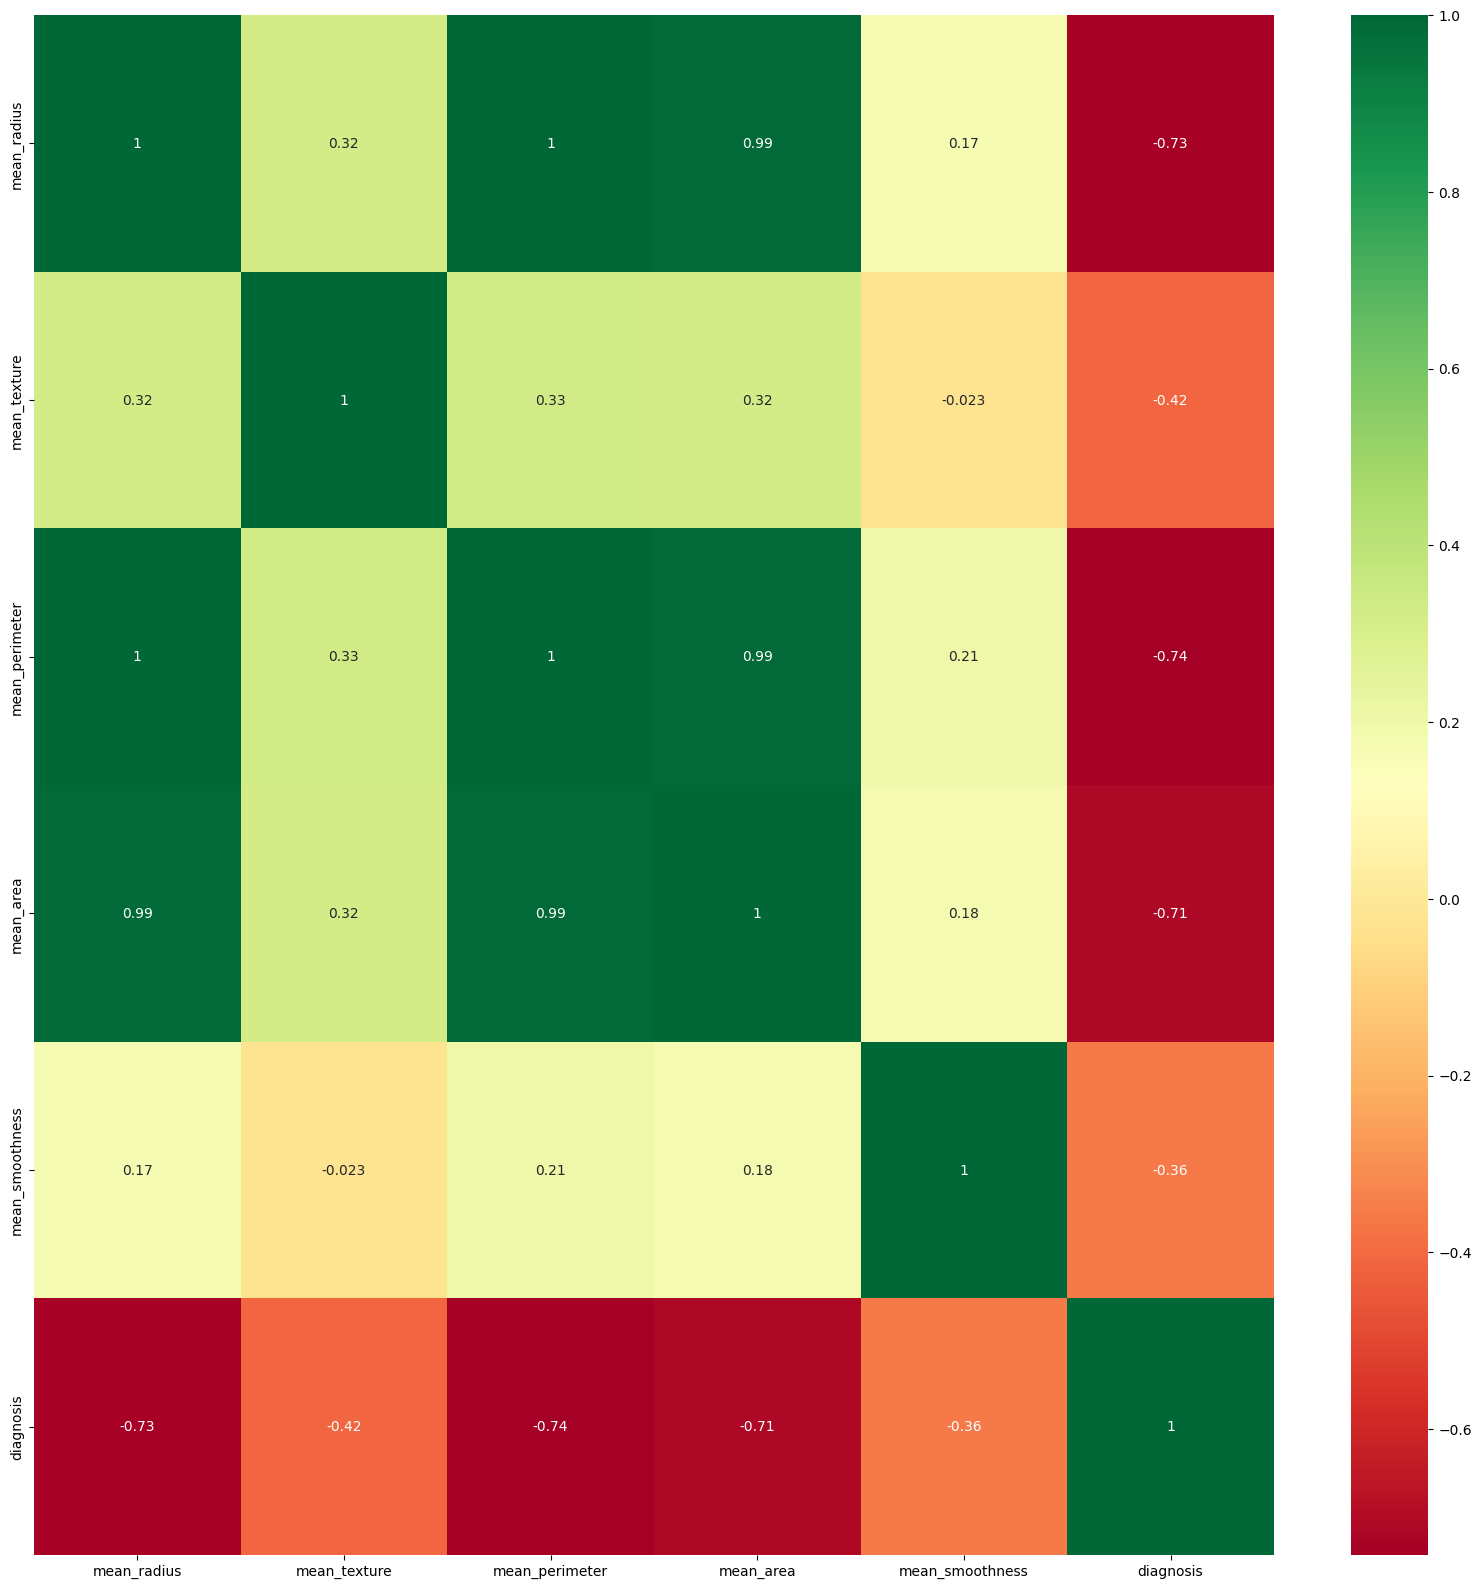

In [7]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [8]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [9]:
!pip install scikit-learn
import sklearn
print(sklearn.__version__)



1.5.1


Defaulting to user installation because normal site-packages is not writeable


In [10]:
from sklearn.model_selection import train_test_split

# split the data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Random Forest Classification model on the Training set

In [13]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

# Making the Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[49  4]
 [ 6 84]]


0.9300699300699301

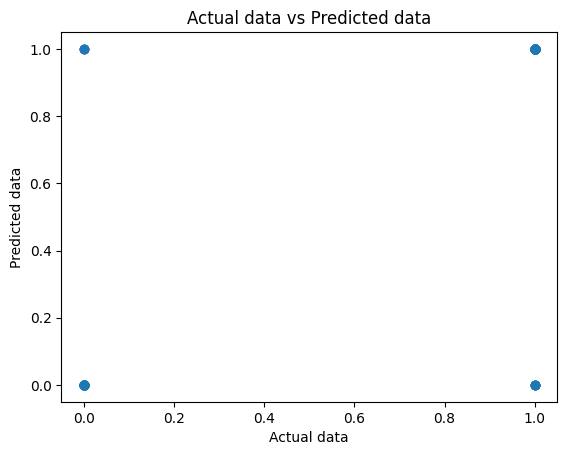

In [15]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual data")
plt.ylabel("Predicted data")
plt.title("Actual data vs Predicted data")
plt.show()

# Predicting the new result

In [16]:
print(classifier.predict(sc.transform([[120,2.5,15,152,26.25]])))
if (classifier[0]== 0):
    print("Person not effected by Breast cancer")
else:
    print("Person effected by Breast cancer")

[1]
Person effected by Breast cancer


# Saving the trained model

In [17]:
import pickle

In [18]:
pickle.dump(classifier,open('breastcancer.pkl','wb'))

In [19]:
pickle.dump(sc,open('sc.pkl','wb'))